# Loading the data

In [1]:
import pandas as pd   
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_table("SMSSpamCollection.txt", 
                    sep="\t",
                    header=None,
                    names=["label", "messages"]) 
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
def explore_data(df):  
    
    print("Shape of the data:- ", df.shape) 
    print('======================================================')
    print("Non of Null values:- ", df.isnull().sum().sum()) 
    print('======================================================')
    print("Information about the data:- ", df.info())  
    print('======================================================')
    print("Describing the data:- ", df.describe())
    print('======================================================')

explore_data(data)

Shape of the data:-  (5572, 2)
Non of Null values:-  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Information about the data:-  None
Describing the data:-         label                messages
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


# Exploratory Data Analysis

Total No. Of Ham Cases :-  4825
Total No. Of Spam Cases :-  747


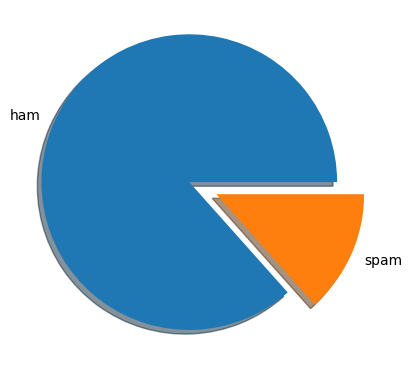

In [4]:
# seeing the distribution of classes, this will help us to identify which types 

len_ham = len(data["label"][data.label == "ham"])
len_spam = len(data["label"][data.label == "spam"])

arr = np.array([len_ham , len_spam]) 
labels = ['ham', 'spam'] 
print("Total No. Of Ham Cases :- ", len_ham)
print("Total No. Of Spam Cases :- ", len_spam)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 

# Text Preprocessing
Stemming and lemmatization are text normalization techniques in Natural Language Processing (NLP) used to reduce words to their base or root forms, which helps in reducing vocabulary size and improving the efficiency of text processing tasks.

In [5]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will") 
    return x  

data["Preprocessed Text"] = data["messages"].apply(lambda x: text_preprocess(x))
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


In [10]:
print(data['messages'][2]) 
print('================================================')  
print(data['Preprocessed Text'][2]) 

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c own apply 08452810075over18 own


# Feature Engineering

In [11]:
data["label"] = data.label.map({'ham':0, 'spam':1})

# Data Development

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Preprocessed Text'], 
                                                    data['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


CountVectorizer is a class that is used to transform a collection of text documents into a numerical matrix of token (typically word) counts.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 

count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Model Development

In [14]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train) 

MultinomialNB()

In [15]:
predictions = naive_bayes.predict(testing_data) 
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions))) 
print('Precision score: ', format(precision_score(y_test, predictions))) 
print('Recall score: ', format(recall_score(y_test, predictions))) 
print('F1 score: ', format(f1_score(y_test, predictions))) 

Accuracy score:  0.9877961234745154
Precision score:  0.9719101123595506
Recall score:  0.9351351351351351
F1 score:  0.953168044077135


An Example using this model

In [17]:
doc = pd.Series("This is the 2nd time we have tried 2 contact u...")
test = count_vector.transform(doc) 

In [18]:
naive_bayes.predict(test)

array([0])

So this means that the text provided is not a spam or is a ham.